In [40]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

[*********************100%***********************]  1 of 1 completed


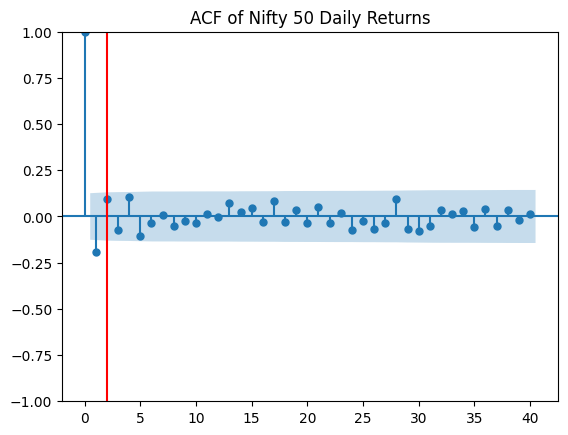

In [41]:
nifty_data = yf.download('^NSEI', start='2023-07-01', end='2024-07-01')
nifty_data['Return'] = nifty_data['Adj Close'].pct_change()
nifty_data = nifty_data.dropna()
x=nifty_data['Return']
plot_acf(nifty_data['Return'], lags=40)
plt.title('ACF of Nifty 50 Daily Returns')
plt.axvline(x=2,color='red')
plt.show()

order can be assumed as 2

In [42]:
sz=2
nifty_data['Squared Return']=nifty_data['Return']**2
nifty_data['Volatility']=nifty_data['Squared Return'].rolling(window=sz).mean()
nifty_data['Benchmark Vol']=nifty_data['Squared Return'].shift(-1)
nifty_data=nifty_data.dropna()
#nifty_data.head()

C:\Users\gupil\AppData\Local\Temp\ipykernel_25904\554115192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['Squared Return']=nifty_data['Return']**2
C:\Users\gupil\AppData\Local\Temp\ipykernel_25904\554115192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['Volatility']=nifty_data['Squared Return'].rolling(window=sz).mean()
C:\Users\gupil\AppData\Local\Temp\ipykernel_25904\554115192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [44]:
rmse=np.sqrt((nifty_data['Volatility']-nifty_data['Benchmark Vol'])**2).mean()
nifty_data.head()
print(rmse)

8.268429977739317e-05


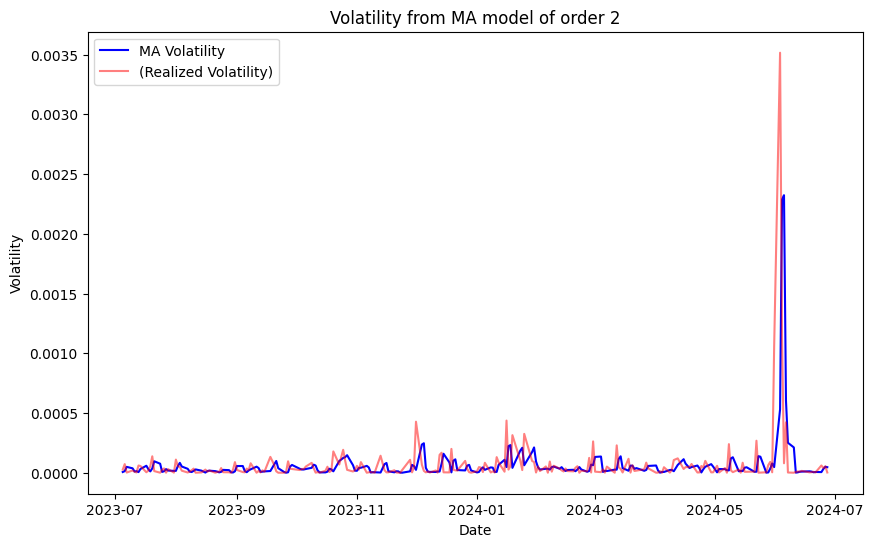

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(nifty_data.index, nifty_data['Volatility'], color='blue', label='MA Volatility')
plt.plot(nifty_data.index, nifty_data['Benchmark Vol'], color='red', alpha=0.5, label='(Realized Volatility)')
plt.title('Volatility from MA model of order 2')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()